# Seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# 데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager

# palette
import seaborn as sns
sns.set_palette("pastel")

# 주피터 노트북
%matplotlib inline

# 한글 폰트
matplotlib.font_manager._rebuild()
sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist if f.name.startswith("Malgun")])

# 폰트 설정
mpl.rc('font', family='Malgun Gothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

## 1차원 분포 플롯

1차원 데이터는 실수 값이면 히스토그램과 같은 실수 분포 플롯으로 나타내고 카테고리 값이면 카운트 플롯으로 나타낸다.

In [2]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

### 1차원 실수 분포 플롯

러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다.

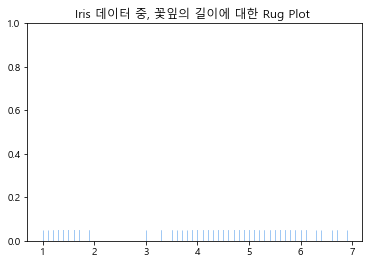

In [3]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.

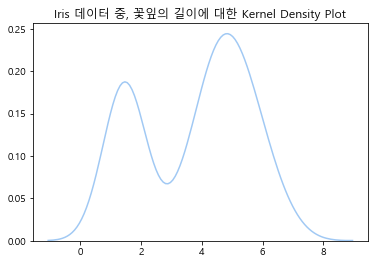

In [4]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

Seaborn의 distplot 명령은 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용된다.

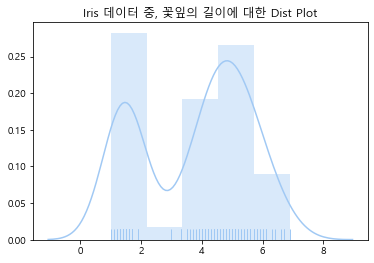

In [5]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

### 카운트 플롯

- countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.
- countplot 명령은 데이터프레임에만 사용할 수 있다. 사용 방법은 다음과 같다.
- data 인수에는 대상이 되는 데이터프레임을, x 인수에는 데이터프레임의 열 이름 문자열을 넣는다. 

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


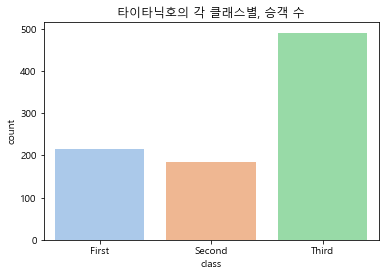

In [7]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

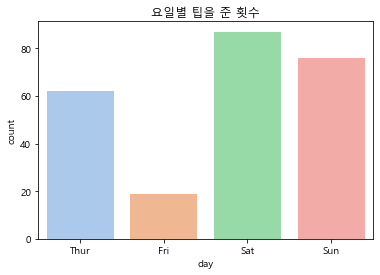

In [8]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

In [9]:
tips.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


## 다차원 데이터

데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있을 수 있다.

### 2차원 실수형 데이터

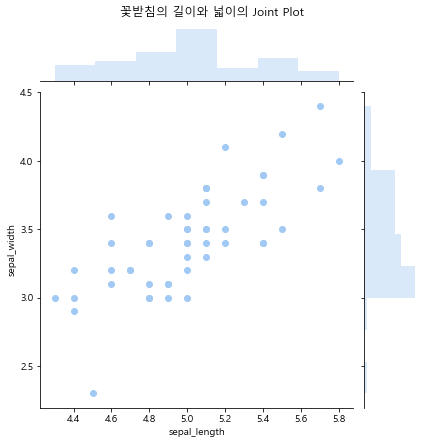

In [10]:
# 군집화(clustering)
# K-Means
# 비지도 학습: 정답이 없다고 가정하고 하는 학습
# iris 에는 k 값이 2 일때가 가장 효율이 좋다.
sns.jointplot(x="sepal_length", y="sepal_width", data=iris[iris.species == 'setosa'])
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

kind='kde'이면 커널 밀도 히스토그램을 그린다.

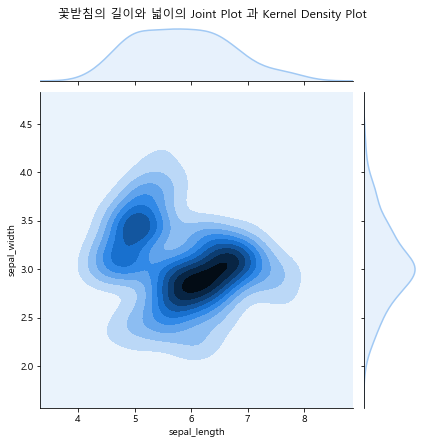

In [11]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

### 다차원 실수형 데이터

만약 3차원 이상의 데이터라면 seaborn 패키지의 pairplot 명령을 사용한다. pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다. 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

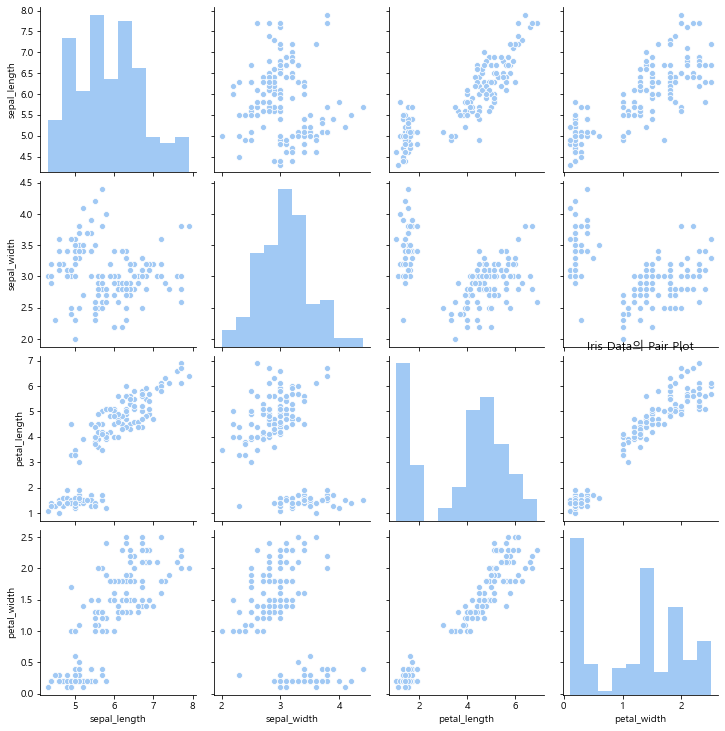

In [12]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

만약 카테고리형 데이터가 섞여 있는 경우에는 hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있다.

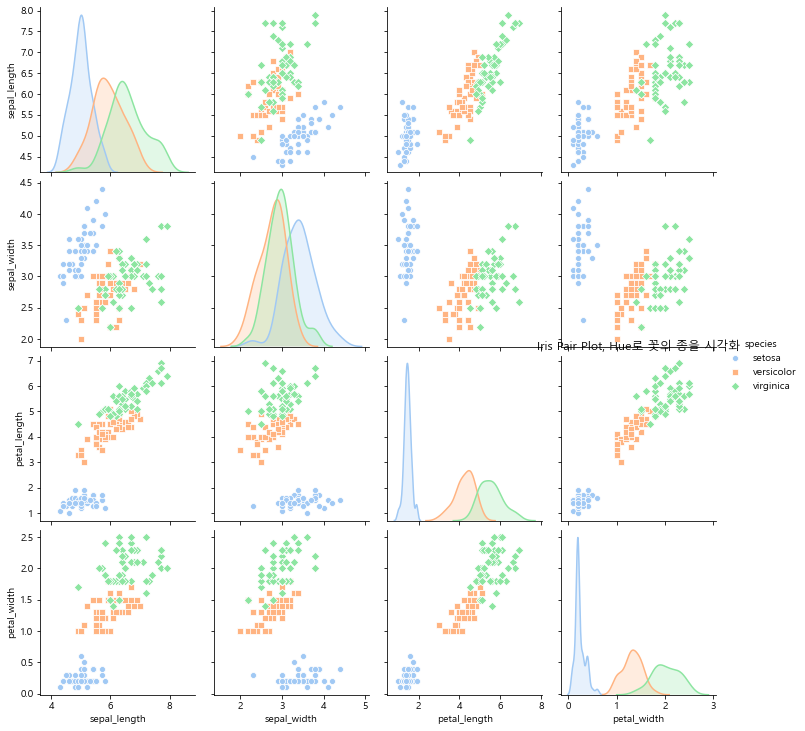

In [13]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

### 2차원 카테고리 데이터

만약 데이터가 2차원이고 모든 값이 카테고리 값이면 heatmap 명령을 사용한다.

In [14]:
titanic_size = titanic.pivot_table(index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


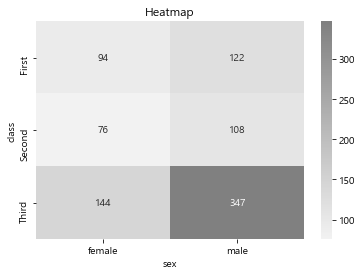

In [15]:
sns.heatmap(titanic_size, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

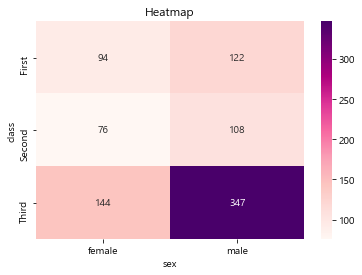

In [16]:
sns.heatmap(titanic_size, cmap="RdPu", annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

### 2차원 복합 데이터

만약 데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 기존의 플롯 이외에도 다음과 같은 분포 플롯들을 이용할 수 있다.

- barplot
- boxplot
- pointplot
- violinplot
- stripplot
- swarmplot

barplot 은 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다. 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.

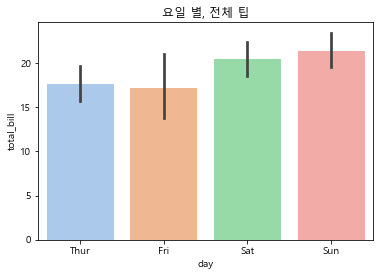

In [17]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

boxplot 명령은 박스-휘스커 플롯(Box-Whisker Plot) 혹은 간단히 박스 플롯이라 부르는 차트를 그려준다. 박스 플롯은 박스와 박스 바깥의 선(whisker)으로 이루어진다.

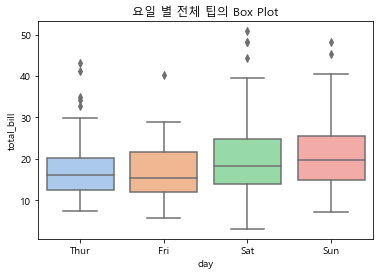

In [18]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

violinplot은 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보인다.

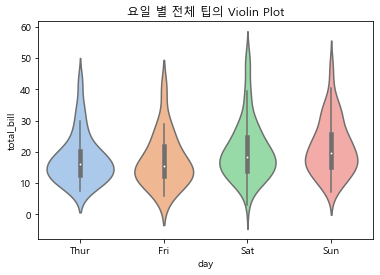

In [19]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

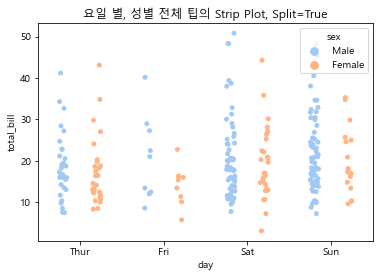

In [20]:
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, jitter=True, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot, Split=True")
plt.show()

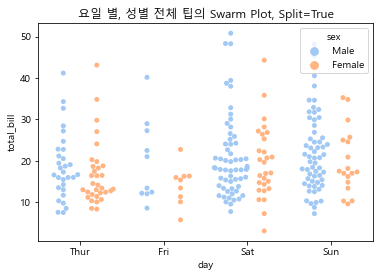

In [21]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot, Split=True")
plt.show()

## 다차원 복합 데이터

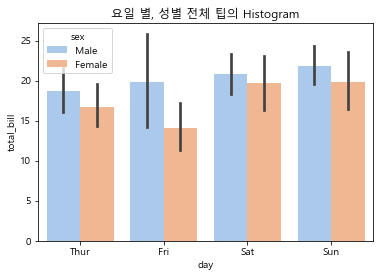

In [22]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

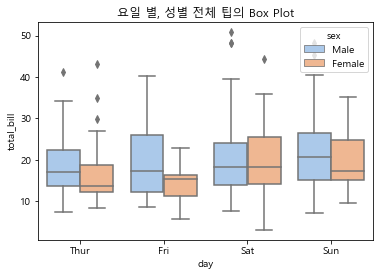

In [23]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

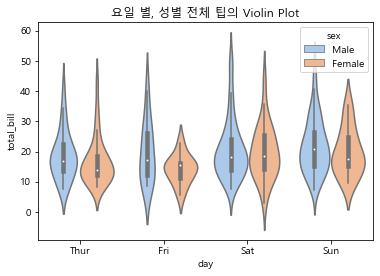

In [24]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.show()

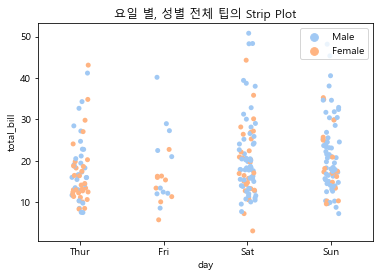

In [25]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

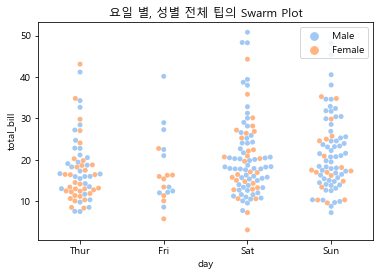

In [26]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot")
plt.legend(loc=1)
plt.show()

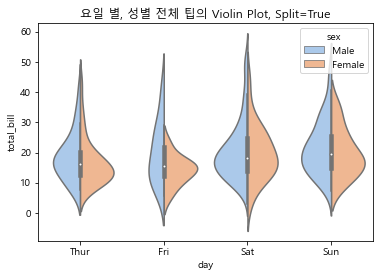

In [27]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
plt.title("요일 별, 성별 전체 팁의 Violin Plot, Split=True")
plt.show()

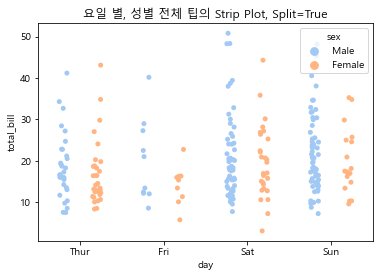

In [28]:
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, jitter=True, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot, Split=True")
plt.show()

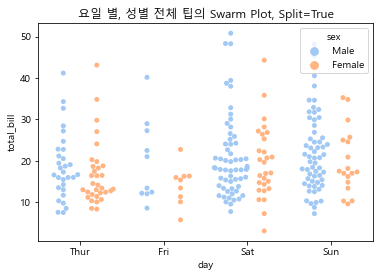

In [29]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot, Split=True")
plt.show()

In [30]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


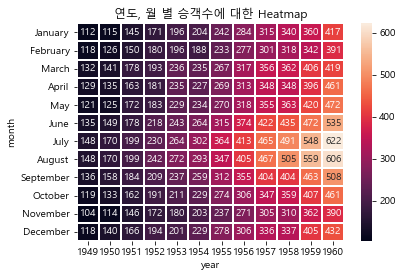

In [31]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

## catplot

catplot은 색상(hue)과 행(row) 등을 동시에 사용하여 3 개 이상의 카테고리 값에 의한 분포 변화를 보여준다.

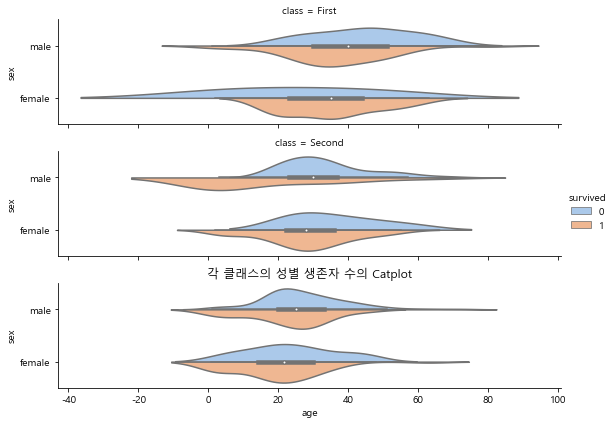

In [32]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", split=True, height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

## 기타

시각화 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표시할 수도 있다.

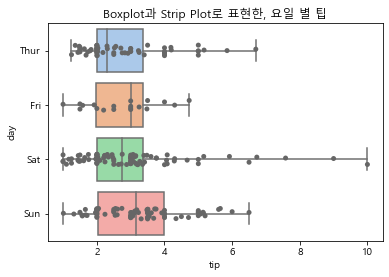

In [33]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

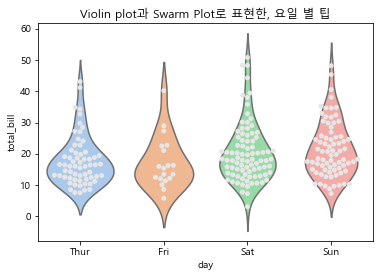

In [34]:
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()

## 스타일

Seaborn을 임포트하면 색상 등을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 기본 스타일로 바꾼다.

In [35]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

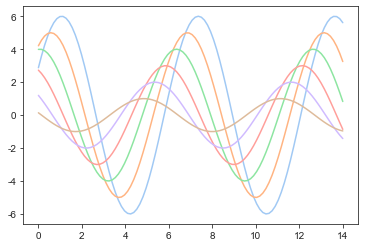

In [36]:
sns.set_style("ticks")
sinplot()

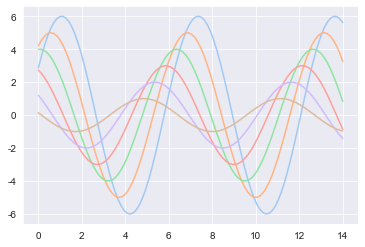

In [37]:
sns.set_style("darkgrid")
sinplot()

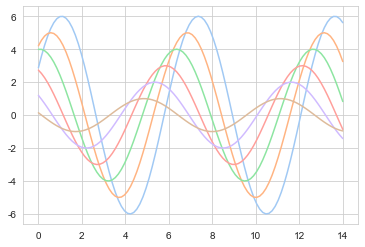

In [38]:
sns.set_style("whitegrid")
sinplot()